# 15 Кластеризация данных

## Генерация точек

In [48]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings("ignore")

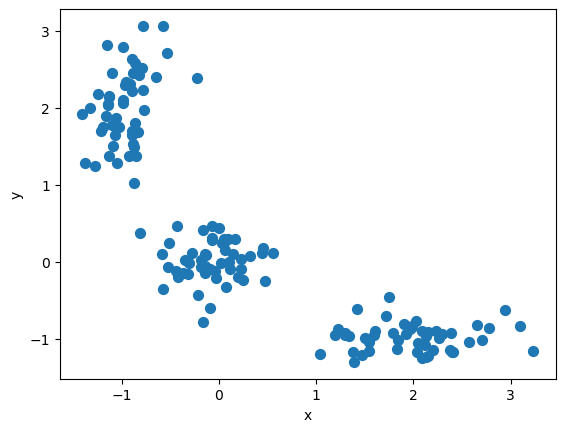

In [49]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## kmeans кластеризация

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


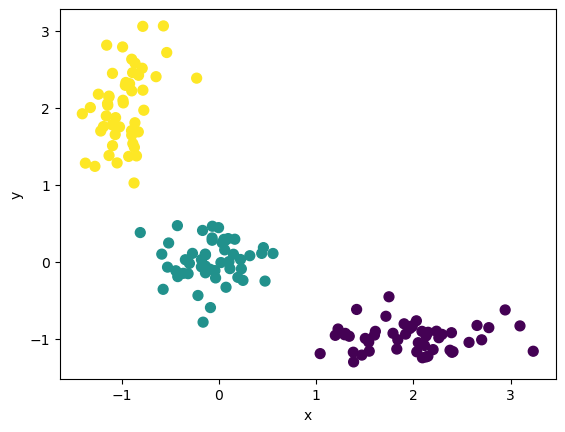

In [50]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## Иерархическая кластеризация

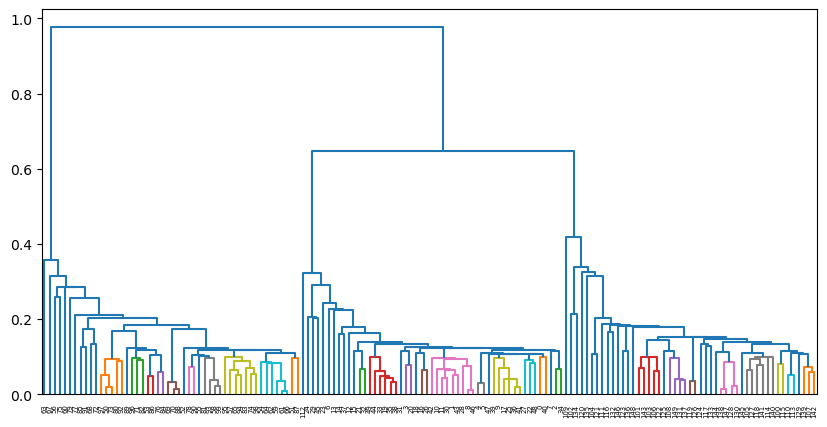

In [51]:
# from sclearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.1)

Что произойдет, если подобрать неверное число кластеров?

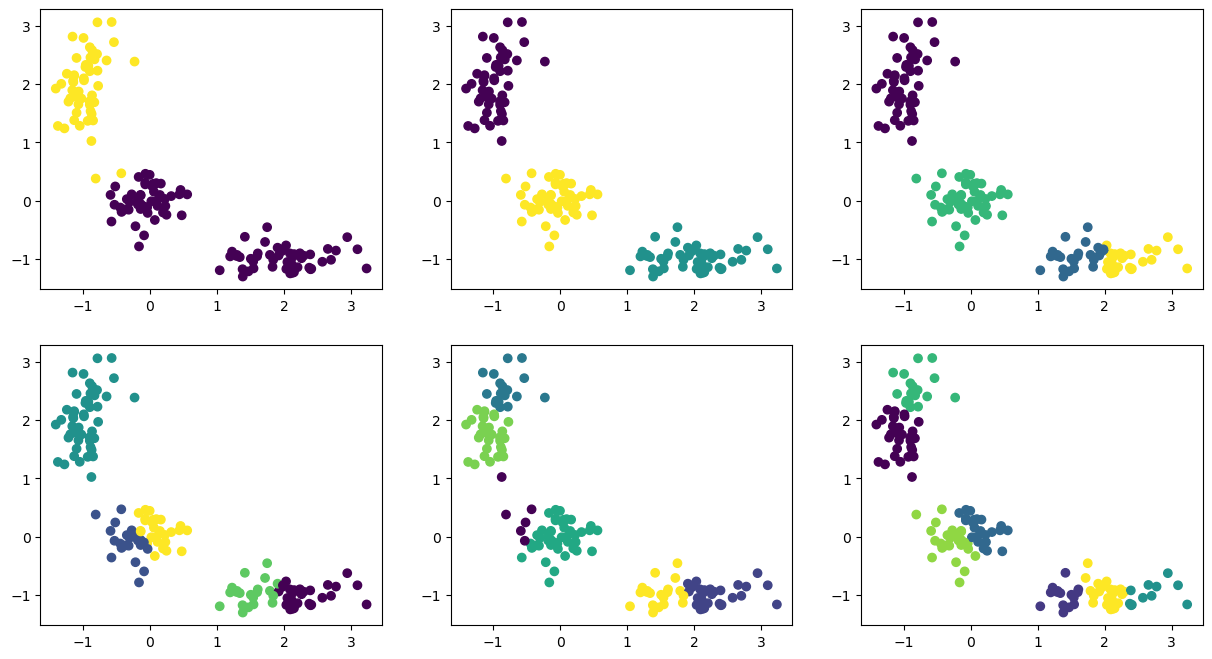

In [52]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)

    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)

plt.show()

## DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

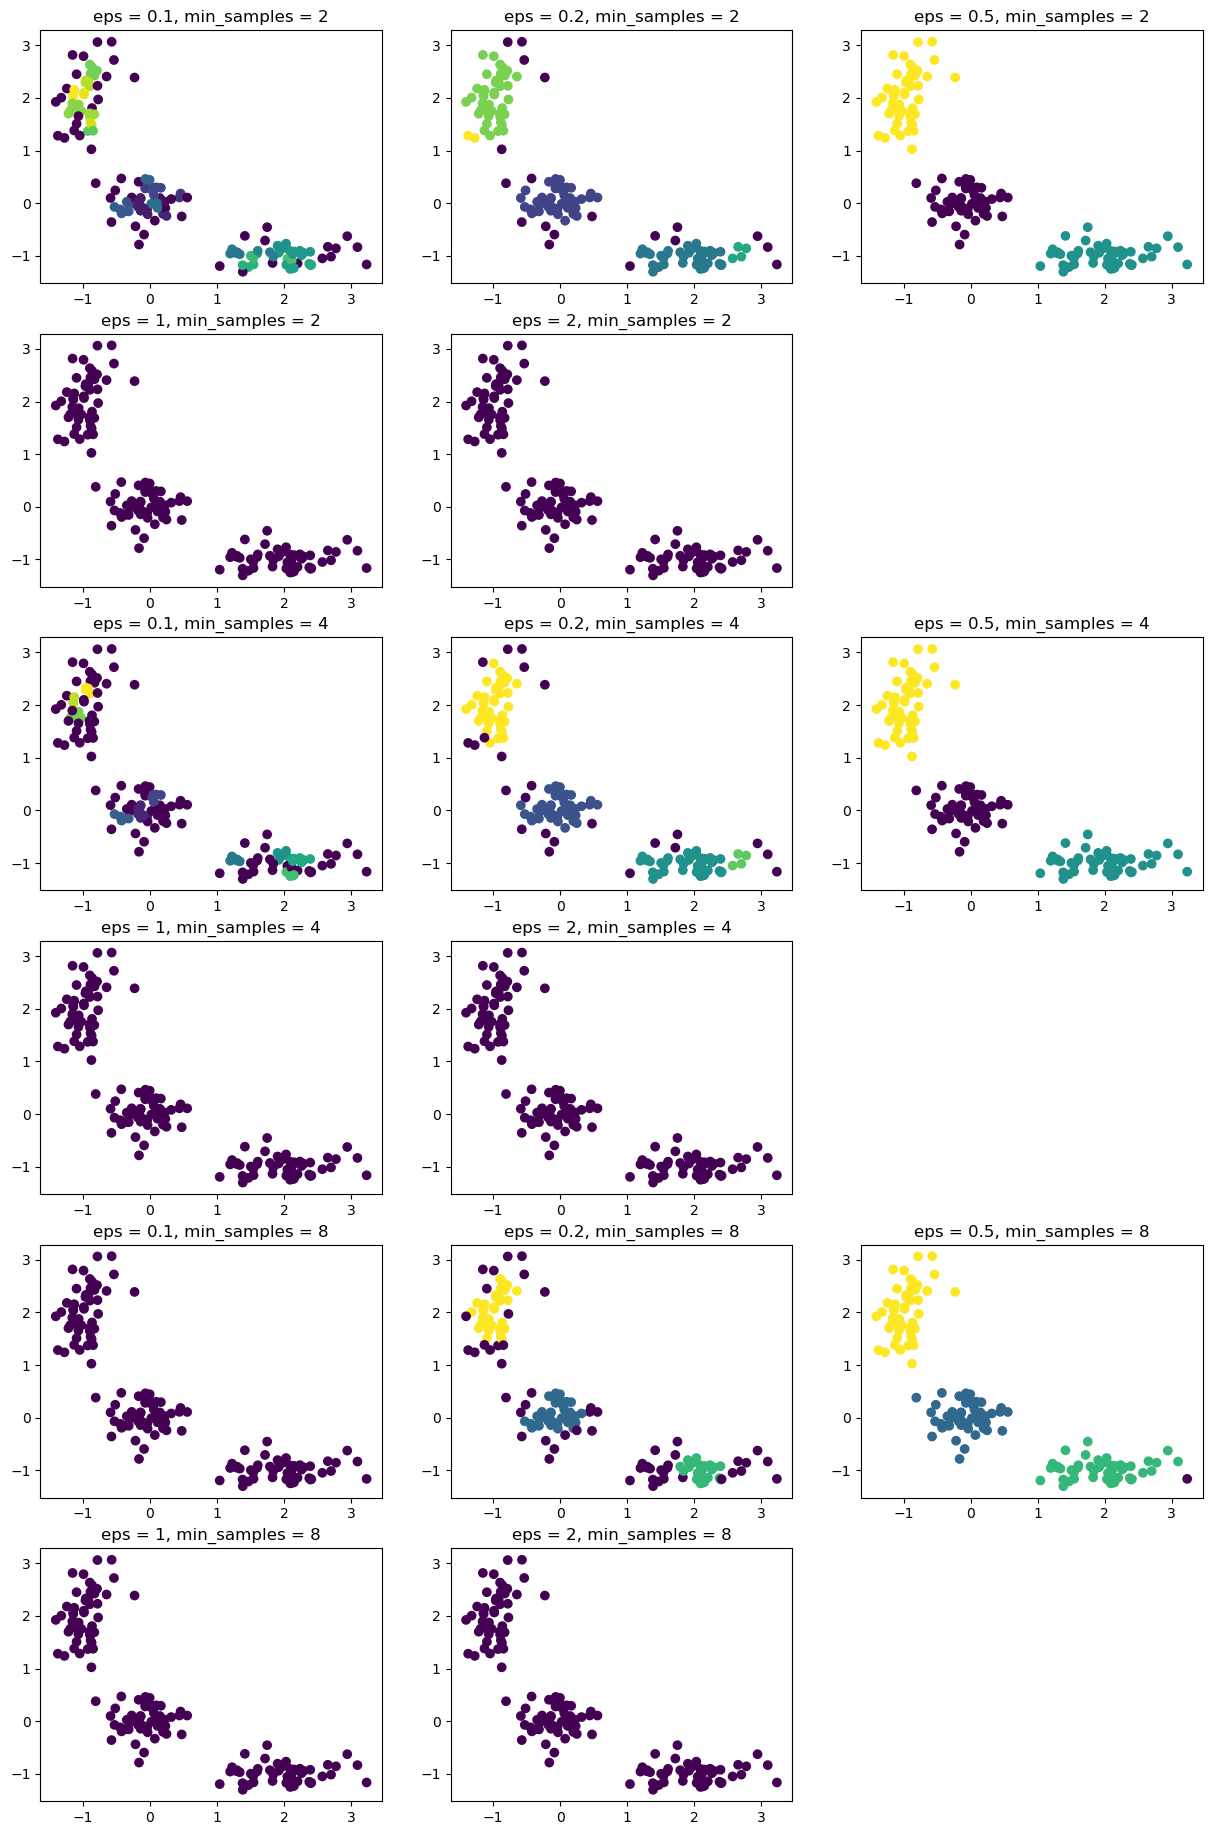

In [53]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i += 1

plt.show()

# Спектральная кластеризация

In [54]:
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Сгенерируем датасет из трех концентрических окружностей

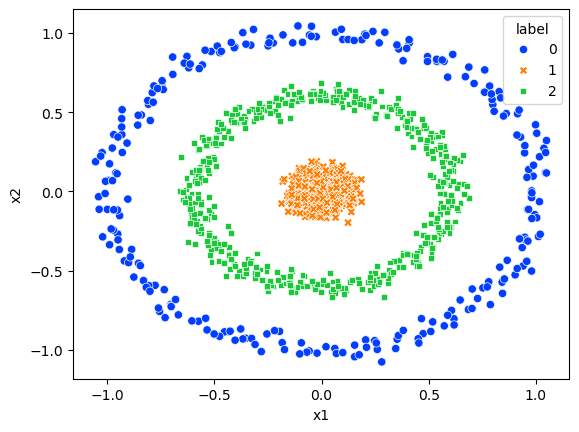

In [55]:
X_small, y_small = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.1)
X_large, y_large = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.6)
y_large[y_large==1] = 2

df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])
df.label.value_counts()
sns.scatterplot(data=df,x='x1',y='x2',hue='label',style='label',palette="bright")
plt.show();

In [56]:
x1 = np.expand_dims(df['x1'].values, axis=1)
x2 = np.expand_dims(df['x2'].values, axis=1)
X = np.concatenate((x1,x2), axis=1)
y = df['label'].values

Применим K-Means

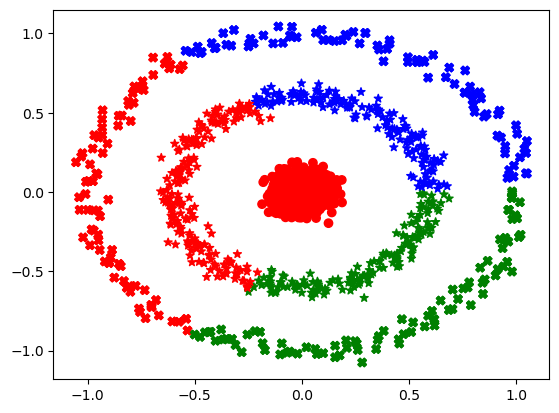

In [57]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show();

Применим спектральную кластеризацию

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, gamma=100).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show();

# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [ ]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [ ]:
# ваш код здесь

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [ ]:
# ваш код здесь

Нормализуйте данные при помощи `normalize`.

In [ ]:
from sklearn.preprocessing import normalize

# ваш код здесь

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [ ]:
from sklearn.cluster import KMeans

# ваш код здесь

Выведите на экран центры кластеров (центроиды)

In [ ]:
# ваш код здесь

centroids = ...

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [ ]:
from scipy import spatial

# ваш код здесь

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [ ]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [ ]:
# ваш код здесь

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

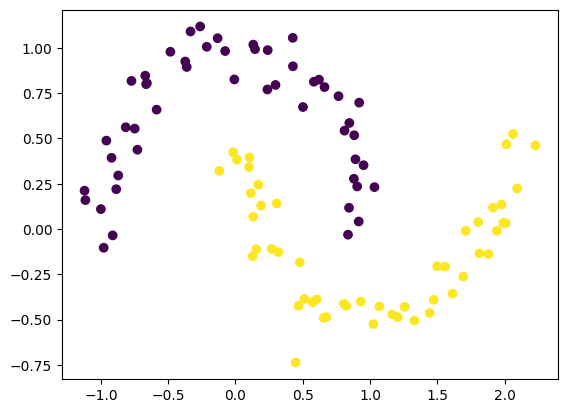

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

In [ ]:
# ваш код здесь

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

In [ ]:
# ваш код здесь

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [ ]:
from sclearn.cluster import AgglomerativeClustering

# ваш код здесь

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

In [ ]:
# ваш код здесь

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?